In [1]:
# to make the seaborn work properly in this learning module, we have to downgrade to matplotlib 3.7.1 
# you can downgrade your matplotlib by running the uninstall and install scripts below in the terminal
#pip uninstall matplotlib
#pip install matplotlib==3.7.1

In [2]:
## mount the Google drive to get access to files in your drive ##
#from google.colab import drive
#drive.mount('/content/drive')

## set the folder that stores your files and data as your current directory ##
#%cd /content/drive/My\ Drive/Colab\ Notebooks

In [3]:
## import libraries and tools ##

import numpy as np
import pandas as pd # 2.2.3

import matplotlib.pyplot as plt # 3.7.1
import seaborn as sns # 0.12.2

import sklearn # 1.2.2

import warnings
warnings.filterwarnings("ignore")

# to display multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# The AI4I2020 Predictive Maintenance Dataset

AI4I2020 Preditive Maintenance Dataset

https://archive.ics.uci.edu/dataset/601/ai4i+2020+predictive+maintenance+dataset

The dataset consists of 10,000 data points stored as rows with 14 features in columns
<ol>
<li>UID: unique identifier ranging from 1 to 10,000 </il>

<li>product ID: consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number</il>

<li> Type: a letter L, M, or H

<li>air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K</il>

<li>process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.</il>

<li>rotational speed [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise.</il>

<li>torque [Nm]: torque values are normally distributed around 40 Nm with a Ïƒ = 10 Nm and no negative values.</il>

<li>tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a 'machine failure' label that indicates, whether the machine has failed in this particular datapoint for any of the following failure modes are true.
</ol>

The machine failure consists of five independent failure modes:
<ol>
<li>tool wear failure (TWF): the tool will be replaced of fail at a randomly selected tool wear time between 200 â€“ 240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).</il>

<li>heat dissipation failure (HDF): heat dissipation causes a process failure, if the difference between air- and process temperature is below 8.6 K and the toolâ€™s rotational speed is below 1380 rpm. This is the case for 115 data points.</il>

<li>power failure (PWF): the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset.</il>

<li>overstrain failure (OSF): if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 datapoints.</il>

<li>random failures (RNF): each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case for only 5 datapoints, less than could be expected for 10,000 datapoints in our dataset.
</ol>

If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1. It is therefore not transparent to the machine learning method, which of the failure modes has caused the process to fail

## Load and understand data

In [4]:
## read the dataset in csv format ##

df = pd.read_csv('Data/ai4i2020.csv')
df.head(10)


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,0,0,0,0,0
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,0,0,0,0,0
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,0,0,0,0,0


In [5]:
# check the variable names, data type, and data size

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [6]:
# change integer data type of numerical features to float data type

df['Tool wear [min]'] = df['Tool wear [min]'].astype('float64')
df['Rotational speed [rpm]'] = df['Rotational speed [rpm]'].astype('float64')

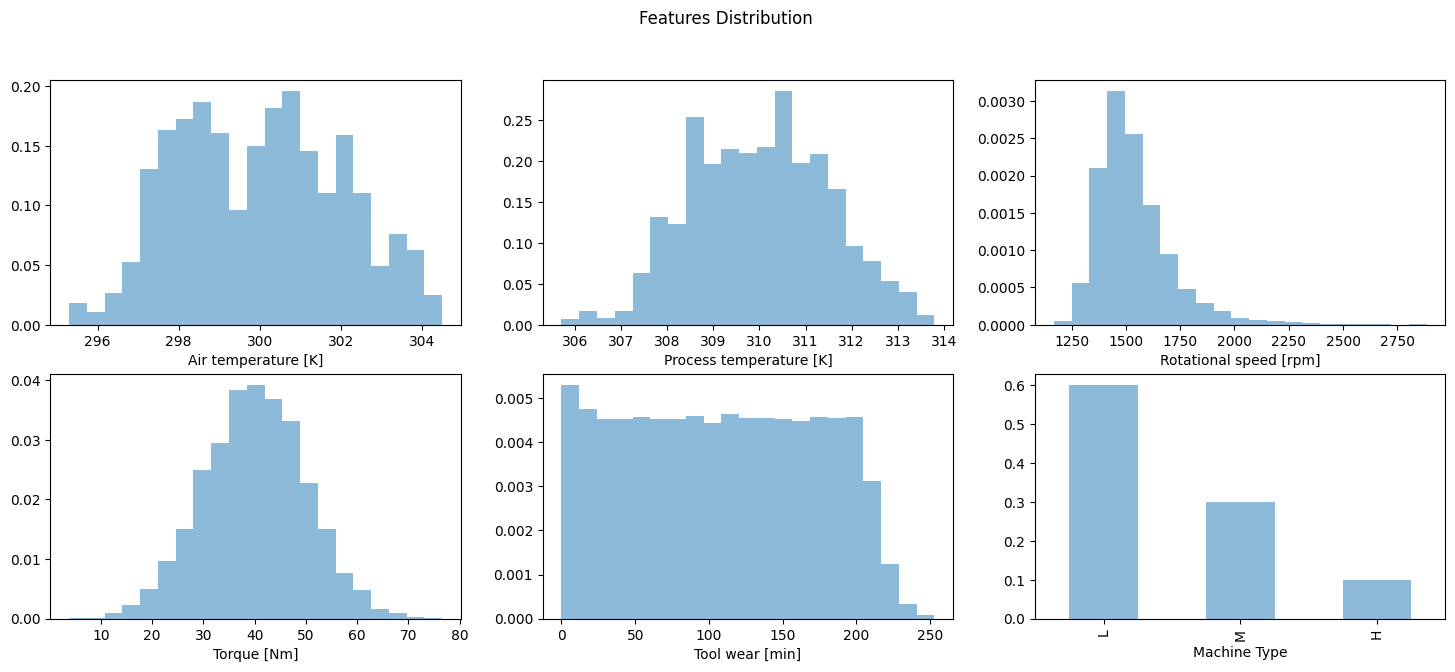

In [7]:
# visually check features

features = df.iloc[:,2:8] # features
num_features = features.iloc[:,1:6] # numerical features


# Histograms of numeric features
fig, axs = plt.subplots(nrows=2, 
                        ncols=3, 
                        figsize=(18,7))
fig.suptitle('Features Distribution')
for j, feature in enumerate(num_features):
    row = j//3
    col = j-j//3*3
    axs[row,col].hist(num_features[feature],
                      bins=21,
                      alpha=0.5,
                      density=True)
    axs[row,col].set_xlabel(feature)

# column chart of categorical feature
type_count = features.iloc[:,0].value_counts()/len(features)
type_count.plot(kind='bar',alpha=0.5)
plt.xlabel('Machine Type')

plt.show();


In [8]:
# review the two target variables, Machine failure and Failure type (recoded from the five dummy variables of failure types)

# create a new column to save categories of failure: 0: no failure, 1: TWF, 2: HDF, 3: PWF, 4: OSF, 5: RNF
target = df.iloc[:,8:14]
target['Failure type']=0 # default value is '0', meanning no failure
for i in range(1,6):
 target.iloc[(target.iloc[:,i]==1),6]=i # 'Failure type'=i if the ith failure type ==1

# check the relationship between `Machine failure' and 'Failure type'
pd.crosstab(target['Machine failure'],
            target['Failure type'], 
            values=target['Failure type'], 
            aggfunc='count')


Failure type,0,1,2,3,4,5
Machine failure,,,,,,
0,9643.0,NaN,NaN,NaN,NaN,18.0
1,9.0,42.0,106.0,83.0,98.0,1.0


## Pre-process data

In [9]:
# check the review of Y above

# There are 9 observations that have machine failure but no failure type has been specified.
# There are 18 observations that have no machine failure but the failure type is RNF.
# There is only 1 observation of machine failure whose failure tye is RNF.
# We exclude those 28 observations from this study
obs_excluded = (target['Machine failure']==1)&(target['Failure type']==0) | (target['Failure type']==5)
df_proc = df[~obs_excluded]


# create a new column to save categories of failure: 0: no failure, 1: TWF, 2: HDF, 3: PWF, 4: OSF
df_proc['Failure type']=0 # default failure type is 0 - no failure
for i in range(9,13):
  df_proc.iloc[(df_proc.iloc[:,i]==1),14]=i-8 #  'Failure type' = i if it is type i failure, for i = 1,..., 4

# drop columns that won't be used by this study
df_proc = df_proc.drop(columns=['UDI','Product ID','TWF','HDF','PWF','OSF','RNF'])

# check the updated dataset
df_proc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9972 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     9972 non-null   object 
 1   Air temperature [K]      9972 non-null   float64
 2   Process temperature [K]  9972 non-null   float64
 3   Rotational speed [rpm]   9972 non-null   float64
 4   Torque [Nm]              9972 non-null   float64
 5   Tool wear [min]          9972 non-null   float64
 6   Machine failure          9972 non-null   int64  
 7   Failure type             9972 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 701.2+ KB


In [10]:
# resampling data to address the class-inbalanced dataset using
# Synthetic Minority Over-sampling Technique for Nominal and Continuous (SMOTNC).
# We keep the ratio of non-failure to failure as 80:20
from imblearn.over_sampling import SMOTENC

n_neg = (df_proc['Failure type']==0).sum() # the sample size for class 0 of 'Failure type'
n_pcs = round((round(n_neg/0.8)-n_neg)/4)  #sample size for each of clases 1~4 of 'Failure type'

# Resampling 
balance_cause = {0:n_neg,
                 1:n_pcs,
                 2:n_pcs,
                 3:n_pcs,
                 4:n_pcs}

sm = SMOTENC(categorical_features=[0,6,7], # specify what columns are categorical variables
             sampling_strategy=balance_cause,  
             random_state=0)

df_resmp, y_resmp = sm.fit_resample(df_proc, 
                                    df_proc['Failure type']) # sampling from df_proc according to the distribution column 'Failure type'

print('Sample size by class - before resampling:')
print(df_proc['Failure type'].value_counts().sort_index())
print('\nSample size by class - after resampling:')
print(y_resmp.value_counts().sort_index())

Sample size by class - before resampling:
Failure type
0    9643
1      42
2     106
3      83
4      98
Name: count, dtype: int64

Sample size by class - after resampling:
Failure type
0    9643
1     603
2     603
3     603
4     603
Name: count, dtype: int64


In [11]:
# Pre-process feature data

# recode the column 'Type' as the dictionary type_dict defines
type_dict = {'L': 0, 'M': 1, 'H': 2}
df_resmp['Type'].replace(to_replace=type_dict,inplace=True)

from sklearn.preprocessing import StandardScaler

# normalize the five numerical features
data = df_resmp.copy()
data.iloc[:,range(1,6)]=StandardScaler().fit_transform(df_resmp.iloc[:,range(1,6)])


In [12]:
# train (80%)-validation (10%)-test (10%) split

from sklearn.model_selection import train_test_split
X, Y = data.iloc[:,range(0,6)], data.iloc[:,[6,7]]
X_train, X_val_test, Y_train, Y_val_test = train_test_split(X, 
                                                            Y, 
                                                            test_size=0.2, 
                                                            stratify=Y['Failure type'], 
                                                            random_state=0)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_test, 
                                                Y_val_test, 
                                                test_size=0.5, 
                                                stratify=Y_val_test['Failure type'], 
                                                random_state=0)

# Evaluation Metrics

In [13]:
# define evaluation metrics for classification

def eval_pred(model,X,Y,task,disp):
    # model: fitted model
    # X: feature vector
    # Y: targets
    # task: 'binary' or 'multi_class'
    # disp: whether displaying results, True or False
    
    from sklearn import metrics
    from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score, f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve, PrecisionRecallDisplay
    
    y_pred = model.predict(X) # predicted label  
    
    if task == 'binary':
        y_true = Y['Machine failure']
        # confusion matrix
        cm = confusion_matrix(y_true, 
                              y_pred)
        # classification performance metrics
        acc = accuracy_score(y_true, 
                             y_pred)
        proba = model.predict_proba(X)[:,1] # probability of class '1'
        auc = roc_auc_score(y_true, 
                            proba)
        
        f1 = f1_score(y_true, 
                      y_pred, 
                      pos_label=1)
        
    elif task == 'multi_class':
        y_true = Y['Failure type']
        # confusion matrix
        cm = confusion_matrix(y_true, 
                              y_pred)
        # classification performance metrics
        acc = accuracy_score(y_true, 
                             y_pred)
        proba = model.predict_proba(X)
        auc = roc_auc_score(y_true, 
                            proba, 
                            multi_class='ovr', # {‘raise’, ‘ovr’, ‘ovo’}, default=’raise’
                            average='weighted') #{‘micro’, ‘macro’, ‘samples’, ‘weighted’} or None, default=’macro’
        f1 = f1_score(y_true, 
                      y_pred, 
                      average='weighted')
    else:
         print('task must be binary or multi_class')   

    scores = round(pd.Series(data={'ACC':acc, 'AUC':auc, 'F1':f1}),3)
    
    if disp == True:
        if task =='binary':
            class_names=['None','Failure'] # name  of classes
        elif task=='multi_class':
            class_names=['None','TWF','HDF','PWF','DSF'] # name  of classes
            
        print('\n Class-level report:')
        print(metrics.classification_report(y_true,y_pred,target_names=class_names))

        print('Task-level report:')
        print(scores,'\n')

        # print confusion matrix
        fig, ax = plt.subplots(figsize=(6,4))
        tick_marks = np.arange(len(class_names))
    
        sns.heatmap(pd.DataFrame(cm), 
                    annot=True, 
                    cmap="YlGnBu" ,
                    fmt='g',
                    xticklabels=class_names,
                    yticklabels=class_names)
    
        ax.xaxis.set_label_position("top")
    
        plt.tight_layout()
        plt.title('Confusion matrix', y=1.1)
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.show()
    
    return cm, scores

# Model

## Model fitting and tuning

In [14]:
#fit model and tune the model by optimizing the hyperparameters

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import time

def tune(mdl,X,Y,params,task):
    # mdl: estimator
    # X: feature vector
    # Y: target
    # params: parameters of the estimator
    # task: type of classificatioin tasks, 'binary' or 'multi_class'
    
    if task=='binary':
        start_time = time.time()
        candidate_models = GridSearchCV(mdl, 
                                        param_grid=params,
                                        cv=5, # five-fold cross validation
                                        scoring=accuracy_score) # 
        candidate_models.fit(X, Y['Machine failure'])
    
    elif task=='multi_class':
        start_time = time.time()
        candidate_models = GridSearchCV(mdl, 
                                        param_grid=params,
                                        cv=5, 
                                        scoring=accuracy_score)
        candidate_models.fit(X, Y['Failure type'])
    else:
        print('task must be binary or multi_class')
        
    print('Best model parameters:', candidate_models.best_params_)
    # Print training times
    train_time = (time.time()-start_time)/60
    print(f'Training time: {train_time:.3f} min')
    
    return candidate_models

## Model comparison

In [15]:
# compare models

def predict_and_evaluate(fitted_models,X,Y,models_ids,task):
    # fitted_models: list of models for comparison
    # X: feature vector
    # Y: targets
    # models_ids: list of model names
    # task: type of task, 'binary' vs 'multi_class'
    
    cm_dict = {key: np.nan for key in models_ids}
    metrics = pd.DataFrame(columns=models_ids)
    y_pred = pd.DataFrame(columns=models_ids)
    
    for fit_model, model_name in zip(fitted_models,models_ids):
        y_pred[model_name] = fit_model.predict(X)
        
        if task == 'binary':
            cm, scores = eval_pred(fit_model,X,Y,task='binary',disp=False)
        elif task == 'multi_class':
            cm, scores = eval_pred(fit_model,X,Y,task='multi_class',disp=False)
        
        cm_dict[model_name] = cm
        metrics[model_name] = scores

    return y_pred, cm_dict, metrics

# Binary Classification

Features:
<ol>
 <li>   Type                     int</il>
 <li>   Air temperature [K]      float64</il>
 <li>   Process temperature [K]  float64</il>
 <li>   Rotational speed [rpm]   float64</il>
 <li>   Torque [Nm]              float64</il>
 <li>   Tool wear [min]          float64
</ol>



Response:
<ol>
<li> Machine failure          int64</il>
</ol>

## Logistic Regression

LogisticRegression in Scikit-learn

https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html

Best model parameters: {'C': 0.1, 'class_weight': {0: 1, 1: 1}, 'l1_ratio': 0, 'penalty': 'elasticnet', 'random_state': 0, 'solver': 'saga'}
Training time: 0.108 min

 Class-level report:
              precision    recall  f1-score   support

        None       0.90      0.96      0.93       964
     Failure       0.78      0.56      0.65       241

    accuracy                           0.88      1205
   macro avg       0.84      0.76      0.79      1205
weighted avg       0.87      0.88      0.87      1205

Task-level report:
ACC    0.880
AUC    0.907
F1     0.649
dtype: float64 



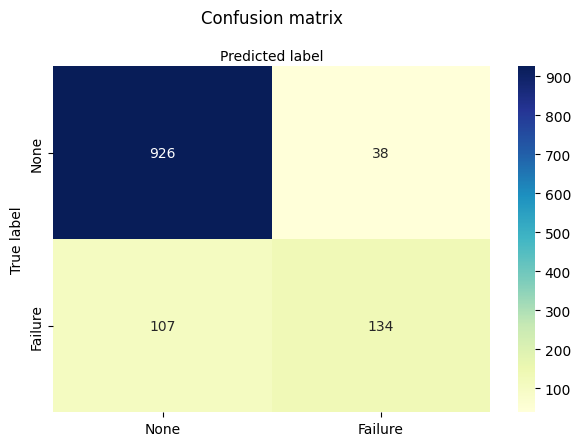

In [16]:
from sklearn.linear_model import LogisticRegression

# model fitting and tuning
lgr=LogisticRegression()

lgr_params = {'penalty':['elasticnet'], 
              'C':[0.1,0.5,1],
              'l1_ratio':[0,0.1,0.5,0.9,0.95,0.99,1], 
              'solver':['saga'], 
              'class_weight':[{0:1,1:1}, {0:1,1:1.01},{0:1,1:1.05},{0:1,1:1.1},{0:1,1:1.2},{0:1,1:1.5}],
              'random_state':[0]}

lgr_model=tune(lgr,
               X_train,
               Y_train,
               lgr_params,
               'binary')

# model evaluation on the validation set
cm, scores = eval_pred(lgr_model,
                       X_val,
                       Y_val,
                       task='binary',
                       disp=True)

## Linear Discriminant Analysis (LDA)

LinearDiscriminantAnalysis in Scikit-learn

https://scikit-learn.org/dev/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

Best model parameters: {'solver': 'svd'}
Training time: 0.001 min

 Class-level report:
              precision    recall  f1-score   support

        None       0.90      0.96      0.93       964
     Failure       0.78      0.59      0.67       241

    accuracy                           0.88      1205
   macro avg       0.84      0.78      0.80      1205
weighted avg       0.88      0.88      0.88      1205

Task-level report:
ACC    0.885
AUC    0.897
F1     0.673
dtype: float64 



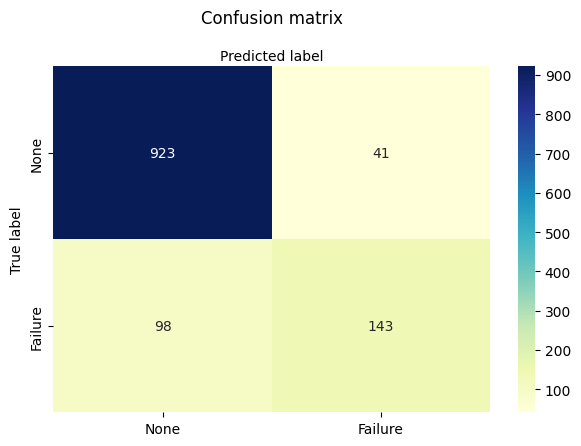

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# model fitting and tuning
lda = LinearDiscriminantAnalysis()

lda_params = {'solver':['svd']}

lda_model=tune(lda,
               X_train,
               Y_train,
               lda_params,
               'binary')

# model evaluation on the validation set
cm, scores = eval_pred(lda_model,
                       X_val,
                       Y_val,
                       task='binary',
                       disp=True)

## Quadratic Descriminant Analysis (QDA)

QuadraticDiscriminantAnalysis in Scikit-learn

https://scikit-learn.org/dev/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html

Best model parameters: {'reg_param': 0}
Training time: 0.001 min

 Class-level report:
              precision    recall  f1-score   support

        None       0.90      0.96      0.93       964
     Failure       0.80      0.57      0.67       241

    accuracy                           0.89      1205
   macro avg       0.85      0.77      0.80      1205
weighted avg       0.88      0.89      0.88      1205

Task-level report:
ACC    0.886
AUC    0.927
F1     0.668
dtype: float64 



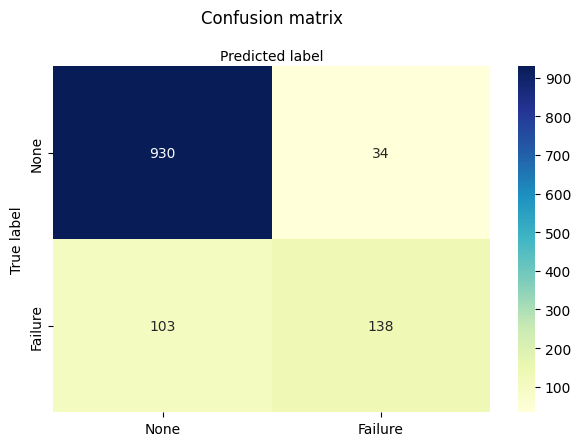

In [18]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# model fitting and tuning
qda=QuadraticDiscriminantAnalysis()

qda_params = {'reg_param':[0,0.05,0.1]}

qda_model=tune(qda,
               X_train,
               Y_train,
               qda_params,
               'binary')

# model evaluation on the validation set
cm, scores = eval_pred(qda_model,
                       X_val,
                       Y_val,
                       task='binary',
                       disp=True)

## Gaussian Naive Bayes (GNB)

GaussianNB in Scikit-learn: 

https://scikit-learn.org/dev/modules/generated/sklearn.naive_bayes.GaussianNB.html

Best model parameters: {'var_smoothing': 1e-10}
Training time: 0.001 min

 Class-level report:
              precision    recall  f1-score   support

        None       0.88      0.96      0.92       964
     Failure       0.73      0.48      0.58       241

    accuracy                           0.86      1205
   macro avg       0.81      0.72      0.75      1205
weighted avg       0.85      0.86      0.85      1205

Task-level report:
ACC    0.861
AUC    0.895
F1     0.581
dtype: float64 



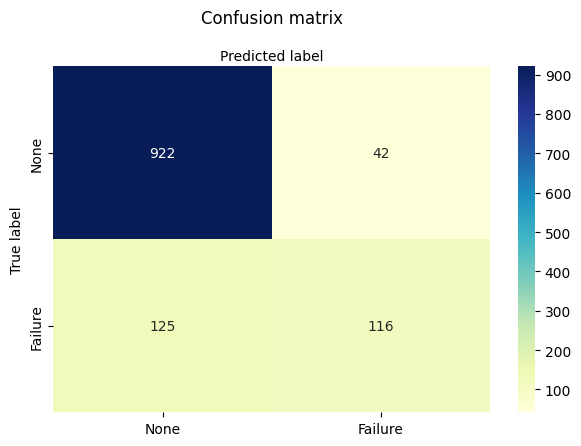

In [19]:
from sklearn.naive_bayes import GaussianNB

# model fitting and tuning
gnb = GaussianNB()

gnb_params = {'var_smoothing':[1e-10,1e-09,1e-7]}

gnb_model=tune(gnb,
               X_train,
               Y_train,
               gnb_params,
               'binary')

# model evaluation on the validation set
cm, scores = eval_pred(gnb_model,
                       X_val,
                       Y_val,
                       task='binary',
                       disp=True)

## Support Vector Machine (SVM)

SVC in Scikit-learn:

https://scikit-learn.org/dev/modules/generated/sklearn.svm.SVC.html

Best model parameters: {'C': 50, 'gamma': 0.05, 'probability': True, 'random_state': 0}
Training time: 1.020 min

 Class-level report:
              precision    recall  f1-score   support

        None       0.96      0.97      0.97       964
     Failure       0.87      0.86      0.86       241

    accuracy                           0.95      1205
   macro avg       0.92      0.91      0.91      1205
weighted avg       0.95      0.95      0.95      1205

Task-level report:
ACC    0.945
AUC    0.986
F1     0.862
dtype: float64 



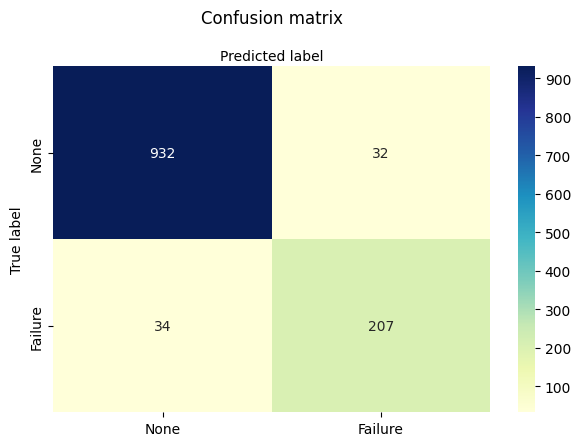

In [20]:
from sklearn.svm import SVC

# model fitting and tuning
svm = SVC()
svm_params = {'C':[50,100,150],
              'gamma':[0.05,0.1,1], 
              'probability':[True], 
              'random_state':[0]}

svm_model=tune(svm,
               X_train,
               Y_train,
               svm_params,
               'binary')

# model evaluation on the validation set
cm, scores = eval_pred(svm_model,
                       X_val,
                       Y_val,
                       task='binary',
                       disp=True)


## Decision Tree

DecisionTreeClassifier in Scikit-learn

https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Best model parameters: {'class_weight': {0: 1, 1: 1}, 'criterion': 'gini', 'max_features': 'auto', 'random_state': 0, 'splitter': 'best'}
Training time: 0.016 min

 Class-level report:
              precision    recall  f1-score   support

        None       0.97      0.98      0.98       964
     Failure       0.93      0.88      0.90       241

    accuracy                           0.96      1205
   macro avg       0.95      0.93      0.94      1205
weighted avg       0.96      0.96      0.96      1205

Task-level report:
ACC    0.962
AUC    0.929
F1     0.902
dtype: float64 



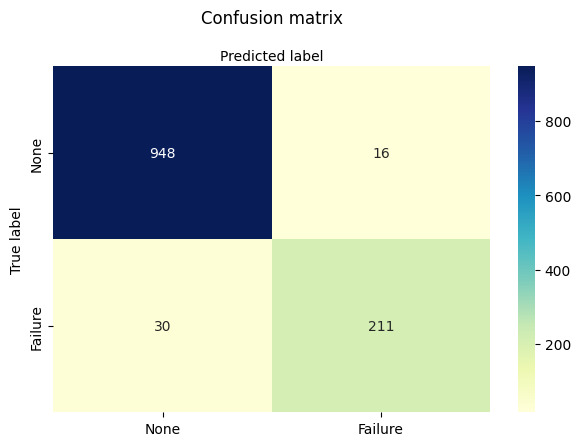

[Text(0.5, 0.875, 'x[3] <= -0.675\ngini = 0.32\nsamples = 9644\nvalue = [7714, 1930]'),
 Text(0.25, 0.625, 'x[1] <= 0.689\ngini = 0.497\nsamples = 2032\nvalue = [936, 1096]'),
 Text(0.125, 0.375, 'x[5] <= 1.04\ngini = 0.472\nsamples = 1267\nvalue = [784, 483]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'x[2] <= 1.492\ngini = 0.318\nsamples = 765\nvalue = [152, 613]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'x[5] <= 1.308\ngini = 0.195\nsamples = 7612\nvalue = [6778, 834]'),
 Text(0.625, 0.375, 'x[4] <= -2.34\ngini = 0.086\nsamples = 6726\nvalue = [6422, 304]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'x[1] <= -1.178\ngini = 0.481\nsamples = 886\nvalue = [356, 530]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

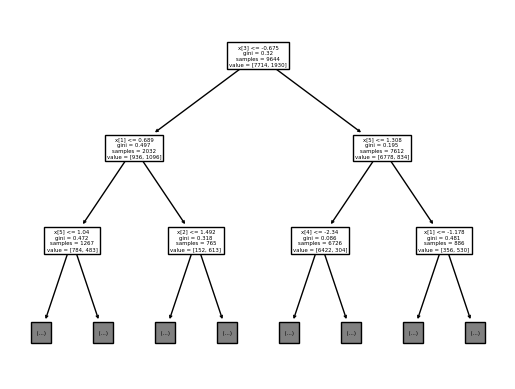

In [21]:
from sklearn.tree import DecisionTreeClassifier

# model fitting and tuning
dtc = DecisionTreeClassifier()

dtc_params = {'criterion':['gini','entropy','log_loss'],
              'splitter':['best','random'],
              'class_weight':[{0:1,1:1},{0:1,1:2}],
              'max_features':['auto',4],  
              'random_state':[0]}

dtc_model=tune(dtc,
               X_train,
               Y_train,
               dtc_params,
               'binary')

# model evaluation on the validation set
cm, scores = eval_pred(dtc_model,
                       X_val,
                       Y_val,
                       task='binary',
                       disp=True)

from sklearn import tree
#dtc.fit(X_train,Y_train['Machine failure''])
tree.plot_tree(DecisionTreeClassifier(random_state=0).fit(X_train,Y_train['Machine failure']),
               max_depth=2)

## Bagging

BaggingClassifier in Scikit-learn

https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.BaggingClassifier.html

Best model parameters: {'n_estimators': 10, 'random_state': 0}
Training time: 0.084 min

 Class-level report:
              precision    recall  f1-score   support

        None       0.98      0.99      0.99       964
     Failure       0.96      0.93      0.94       241

    accuracy                           0.98      1205
   macro avg       0.97      0.96      0.96      1205
weighted avg       0.98      0.98      0.98      1205

Task-level report:
ACC    0.978
AUC    0.997
F1     0.943
dtype: float64 



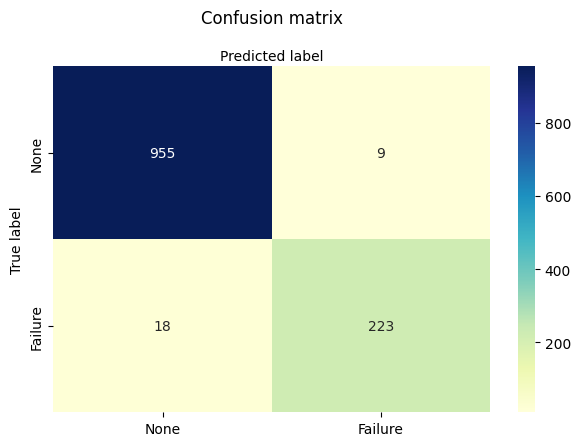

In [22]:
from sklearn.ensemble import BaggingClassifier

# model fitting and tuning
bgc = BaggingClassifier()

bgc_params ={'n_estimators':[10,20,50],
             'random_state':[0]}

bgc_model = tune(bgc,
                 X_train,
                 Y_train,
                 bgc_params,
                 'binary')

# model evaluation on the validation set
cm, scores = eval_pred(bgc_model,
                       X_val,
                       Y_val,
                       task='binary',
                       disp=True)

## Ada Boosting

AdaBoostClassifier in Scikit-learn

https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

Best model parameters: {'learning_rate': 0.5, 'n_estimators': 20, 'random_state': 0}
Training time: 0.217 min

 Class-level report:
              precision    recall  f1-score   support

        None       0.91      0.97      0.94       964
     Failure       0.82      0.60      0.70       241

    accuracy                           0.89      1205
   macro avg       0.87      0.78      0.82      1205
weighted avg       0.89      0.89      0.89      1205

Task-level report:
ACC    0.895
AUC    0.966
F1     0.695
dtype: float64 



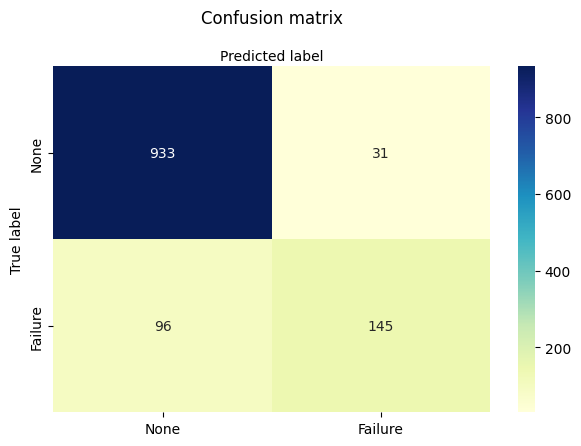

In [23]:
from sklearn.ensemble import AdaBoostClassifier

# model fitting and tuning
adb = AdaBoostClassifier()

adb_params ={'n_estimators':[20,50,100],
             'learning_rate':[0.5,0.5,1,2],
             'random_state':[0]}

adb_model = tune(adb,
                 X_train,
                 Y_train,
                 adb_params,
                 'binary')

# model evaluation on the validation set
cm, scores = eval_pred(adb_model,
                       X_val,
                       Y_val,
                       task='binary',
                       disp=True)

## Gradient Boosting Classifier

GradientBoostingClassifier in Scikit-learn

https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

Best model parameters: {'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 0}
Training time: 0.079 min

 Class-level report:
              precision    recall  f1-score   support

        None       0.98      0.97      0.98       964
     Failure       0.90      0.91      0.91       241

    accuracy                           0.96      1205
   macro avg       0.94      0.94      0.94      1205
weighted avg       0.96      0.96      0.96      1205

Task-level report:
ACC    0.962
AUC    0.993
F1     0.905
dtype: float64 



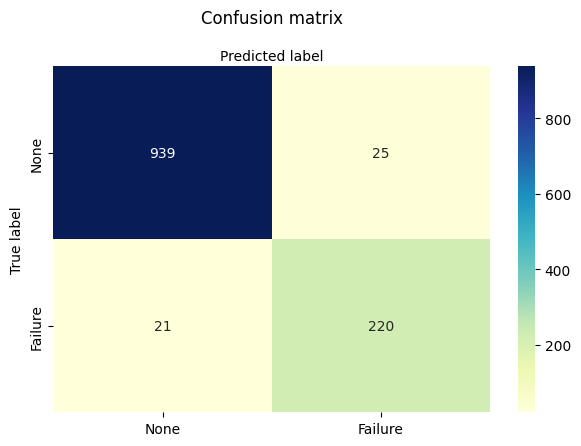

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

# model fitting and tuning
gbc = GradientBoostingClassifier()

gbc_params ={'n_estimators':[100],
             'learning_rate':[0.1],
             'random_state':[0]}

gbc_model = tune(gbc,
                 X_train,
                 Y_train,
                 gbc_params,
                 'binary')

# model evaluation on the validation set
cm, scores = eval_pred(gbc_model,
                       X_val,
                       Y_val,
                       task='binary',
                       disp=True)

## Random Forest

RandomForestClassifier in Scikit-learn

https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Best model parameters: {'criterion': 'gini', 'max_features': None, 'n_estimators': 10, 'random_state': 0}
Training time: 0.620 min

 Class-level report:
              precision    recall  f1-score   support

        None       0.98      0.99      0.99       964
     Failure       0.96      0.93      0.94       241

    accuracy                           0.98      1205
   macro avg       0.97      0.96      0.96      1205
weighted avg       0.98      0.98      0.98      1205

Task-level report:
ACC    0.977
AUC    0.997
F1     0.941
dtype: float64 



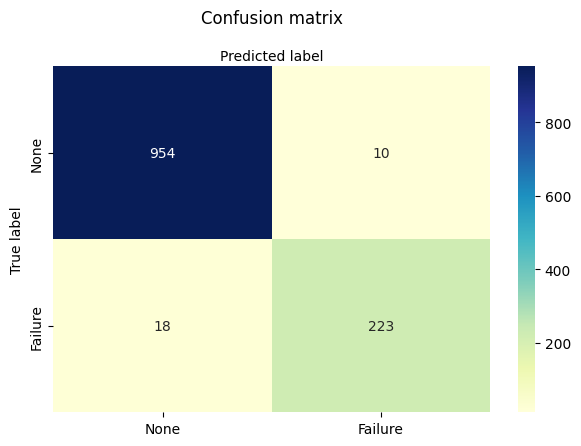

In [25]:
from sklearn.ensemble import RandomForestClassifier

# model fitting and tuning
rfc = RandomForestClassifier()

rfc_params = {'n_estimators':[10,50,100], 
              'criterion':['gini','log_loss'],
              'max_features':[None,'sqrt','log2'],  
              'random_state':[0]}

rfc_model=tune(rfc,
               X_train,
               Y_train,
               rfc_params,
               'binary')

# model evaluation on the validation set
cm, scores = eval_pred(rfc_model,
                       X_val,
                       Y_val,
                       task='binary',
                       disp=True)

## Stacking

StackingClassifier in Scikit-learn

https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.StackingClassifier.html


 Class-level report:
              precision    recall  f1-score   support

        None       1.00      1.00      1.00       964
     Failure       1.00      0.99      0.99       241

    accuracy                           1.00      1205
   macro avg       1.00      1.00      1.00      1205
weighted avg       1.00      1.00      1.00      1205

Task-level report:
ACC    0.998
AUC    1.000
F1     0.994
dtype: float64 



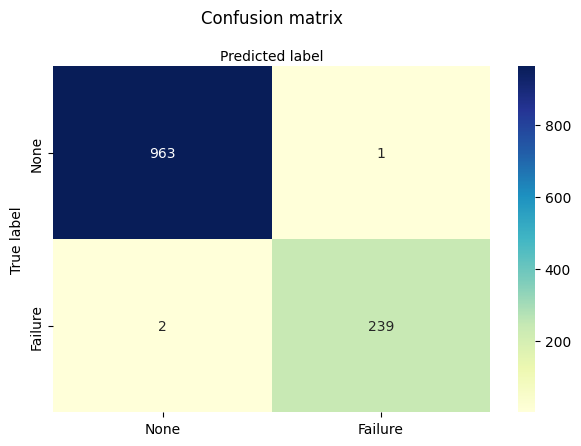

In [26]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline

# model fitting and tuning
estimators = [('rfc', RandomForestClassifier(n_estimators=10, random_state=10)),
              ('svm', make_pipeline(LinearSVC(random_state=10)))]

stk = StackingClassifier(estimators=estimators)

stk_model=stk.fit(X_val,
                  Y_val['Machine failure'])

# model evaluation on the validation set
cm, scores = eval_pred(stk_model,
                       X_val,
                       Y_val,
                       task='binary',
                       disp=True)

## Comparison on the test dataset

In [27]:
models_ids = ['lgr','lda','qda','gnb','svm','dtc','bgc','adb','gbc','rfc','stk']
fitted_models=[lgr_model,lda_model,qda_model,gnb_model,svm_model,dtc_model,bgc_model,adb_model,gbc_model,rfc_model,stk_model]

y_pred, cm_dict, scores = predict_and_evaluate(fitted_models,
                                               X_test,
                                               Y_test,
                                               models_ids,
                                               'binary')

print('Comparison of clssasification models on the test dataset:')
print(scores)


Comparison of clssasification models on the test dataset:
       lgr    lda    qda    gnb    svm    dtc    bgc    adb    gbc    rfc  \
ACC  0.890  0.891  0.885  0.860  0.941  0.975  0.980  0.905  0.962  0.985   
AUC  0.911  0.901  0.931  0.897  0.984  0.963  0.998  0.965  0.994  0.999   
F1   0.673  0.686  0.667  0.589  0.857  0.938  0.951  0.727  0.907  0.963   

       stk  
ACC  0.937  
AUC  0.977  
F1   0.849  


# Multiclass Classification

Features:
<ol>
 <li>   Type                     int</il>
 <li>   Air temperature [K]      float64</il>
 <li>   Process temperature [K]  float64</il>
 <li>   Rotational speed [rpm]   float64</il>
 <li>   Torque [Nm]              float64</il>
 <li>   Tool wear [min]          float64
</ol>



Response:
<ol>
<li> Failure type          int64</il>
</ol>

## Multinomial Logistic regression

Best model parameters: {'C': 1, 'class_weight': {0: 1, 1: 4, 2: 4, 3: 4, 4: 4}, 'l1_ratio': 0, 'penalty': 'elasticnet', 'random_state': 0, 'solver': 'saga'}
Training time: 0.307 min

 Class-level report:
              precision    recall  f1-score   support

        None       0.99      0.94      0.97       964
         TWF       0.66      0.95      0.78        61
         HDF       0.76      0.98      0.86        60
         PWF       0.92      0.98      0.95        60
         DSF       0.92      0.98      0.95        60

    accuracy                           0.95      1205
   macro avg       0.85      0.97      0.90      1205
weighted avg       0.96      0.95      0.95      1205

Task-level report:
ACC    0.947
AUC    0.989
F1     0.950
dtype: float64 



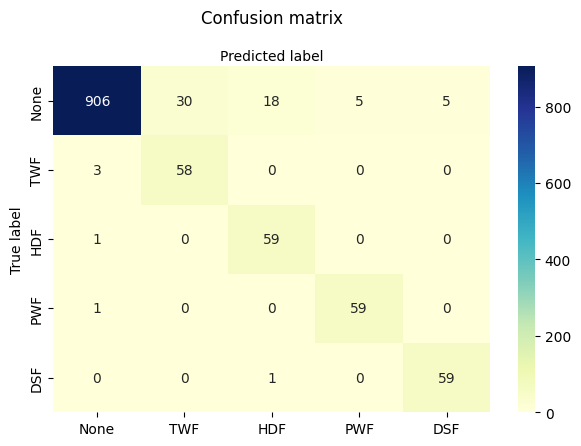

In [28]:
from sklearn.utils import class_weight
from sklearn.linear_model import LogisticRegression

# model fitting and tuning
lgr=LogisticRegression()
#lgr_params = {'penalty':['elasticnet'], 'C':[0.1,0.5,1],'l1_ratio':[0,0.1,0.5,0.9,0.95,0.99,1], 'solver':['saga'],'random_state':[0]}
lgr_params = {'penalty':['elasticnet',None], 
              'C':[1,2],'l1_ratio':[0,1], 
              'solver':['saga'],
              'class_weight':[{0:1,1:4,2:4,3:4,4:4},{0:1,1:2,2:2,3:2,4:2},{0:1,1:1,2:1,3:1,4:1}],
              'random_state':[0]}

lgr_model=tune(lgr,
               X_train,
               Y_train,
               lgr_params,
               'multi_class')

# model evaluation on the validation set
cm, scores = eval_pred(lgr_model,
                       X_val,
                       Y_val,
                       task='multi_class',
                       disp=True)

## Linear Discriminant Analysis (LDA)

Best model parameters: {'solver': 'svd'}
Training time: 0.001 min

 Class-level report:
              precision    recall  f1-score   support

        None       0.91      0.98      0.94       964
         TWF       0.00      0.00      0.00        61
         HDF       0.86      0.50      0.63        60
         PWF       0.93      0.83      0.88        60
         DSF       0.68      0.83      0.75        60

    accuracy                           0.89      1205
   macro avg       0.67      0.63      0.64      1205
weighted avg       0.85      0.89      0.87      1205

Task-level report:
ACC    0.891
AUC    0.973
F1     0.865
dtype: float64 



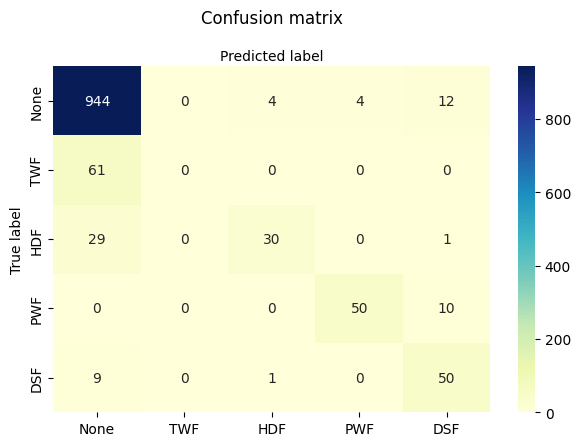

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# model fitting and tuning
lda = LinearDiscriminantAnalysis()

lda_params = {'solver':['svd']}

lda_model=tune(lda,
               X_train,
               Y_train,
               lda_params,
               'multi_class')

# model evaluation on the validation set
cm, scores = eval_pred(lda_model,
                       X_val,
                       Y_val,
                       task='multi_class',
                       disp=True)

## Quadratic Descriminant Analysis (QDA)

Best model parameters: {'reg_param': 0}
Training time: 0.001 min

 Class-level report:
              precision    recall  f1-score   support

        None       0.99      0.96      0.97       964
         TWF       0.75      0.87      0.80        61
         HDF       0.85      0.92      0.88        60
         PWF       0.94      0.98      0.96        60
         DSF       0.88      0.97      0.92        60

    accuracy                           0.96      1205
   macro avg       0.88      0.94      0.91      1205
weighted avg       0.96      0.96      0.96      1205

Task-level report:
ACC    0.956
AUC    0.991
F1     0.957
dtype: float64 



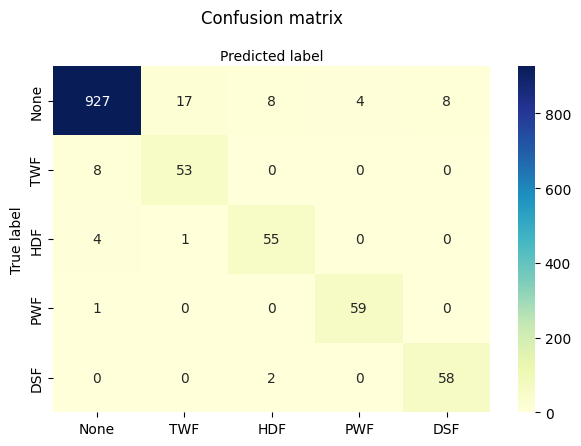

In [30]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# model fitting and tuning
qda=QuadraticDiscriminantAnalysis()

qda_params = {'reg_param':[0,0.05,0.1,0.5]}

qda_model=tune(qda,
               X_train,
               Y_train,
               qda_params,
               'multi_class')

# model evaluation on the validation set
cm, scores = eval_pred(qda_model,
                       X_val,
                       Y_val,
                       task='multi_class',
                       disp=True)

## Gaissian Naive Bayes (GNB)

Best model parameters: {'var_smoothing': 1e-09}
Training time: 0.001 min

 Class-level report:
              precision    recall  f1-score   support

        None       0.95      0.92      0.94       964
         TWF       0.75      0.77      0.76        61
         HDF       0.68      0.90      0.78        60
         PWF       0.64      0.65      0.64        60
         DSF       0.77      0.97      0.86        60

    accuracy                           0.90      1205
   macro avg       0.76      0.84      0.79      1205
weighted avg       0.91      0.90      0.90      1205

Task-level report:
ACC    0.899
AUC    0.961
F1     0.901
dtype: float64 



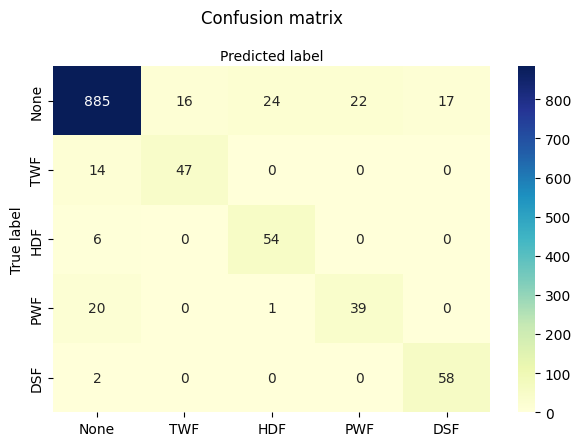

In [31]:
from sklearn.naive_bayes import GaussianNB

# model fitting and tuning
gnb = GaussianNB()

gnb_params = {'var_smoothing':[1e-09,1e-7]}

gnb_model=tune(gnb,
               X_train,
               Y_train,
               gnb_params,
               'multi_class')

# model evaluation on the validation set
cm, scores = eval_pred(gnb_model,
                       X_val,
                       Y_val,
                       task='multi_class',
                       disp=True)

## Support Vector Machine (SVM)

Best model parameters: {'C': 50, 'gamma': 0.05, 'probability': True, 'random_state': 0}
Training time: 0.940 min

 Class-level report:
              precision    recall  f1-score   support

        None       0.98      0.98      0.98       964
         TWF       0.79      0.69      0.74        61
         HDF       0.88      0.95      0.91        60
         PWF       0.97      0.97      0.97        60
         DSF       1.00      1.00      1.00        60

    accuracy                           0.96      1205
   macro avg       0.92      0.92      0.92      1205
weighted avg       0.96      0.96      0.96      1205

Task-level report:
ACC    0.963
AUC    0.993
F1     0.962
dtype: float64 



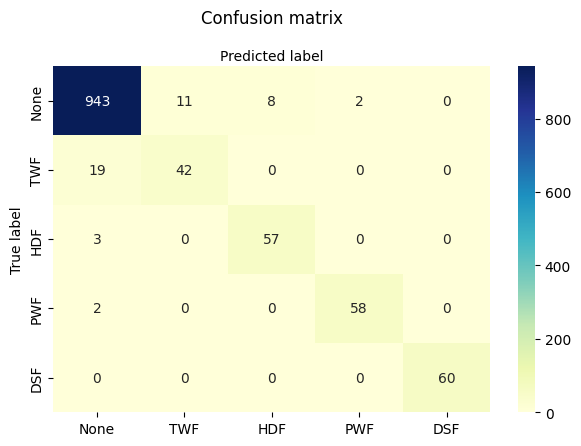

In [32]:
from sklearn.svm import SVC

# model fitting and tuning
svm = SVC()

svm_params = {'C':[50,100,150],
              'gamma':[0.05,0.1,1], 
              'probability':[True], 
              'random_state':[0]}

svm_model=tune(svm,
               X_train,
               Y_train,
               svm_params,
               'multi_class')

# model evaluation on the validation set
cm, scores = eval_pred(svm_model,
                       X_val,
                       Y_val,
                       task='multi_class',
                       disp=True)


## Decision Tree

Best model parameters: {'class_weight': {0: 1, 1: 1}, 'criterion': 'gini', 'max_features': 'auto', 'random_state': 0, 'splitter': 'best'}
Training time: 0.017 min

 Class-level report:
              precision    recall  f1-score   support

        None       0.97      0.98      0.97       964
         TWF       0.92      0.79      0.85        61
         HDF       0.81      0.92      0.86        60
         PWF       0.98      0.90      0.94        60
         DSF       0.90      0.95      0.93        60

    accuracy                           0.96      1205
   macro avg       0.92      0.91      0.91      1205
weighted avg       0.96      0.96      0.96      1205

Task-level report:
ACC    0.959
AUC    0.936
F1     0.958
dtype: float64 



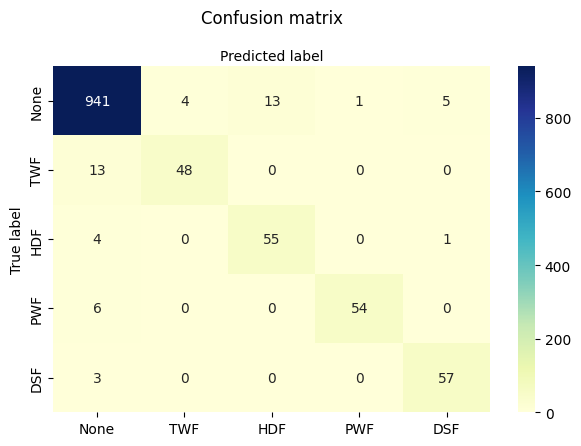

[Text(0.5, 0.875, 'x[3] <= -0.675\ngini = 0.32\nsamples = 9644\nvalue = [7714, 1930]'),
 Text(0.25, 0.625, 'x[1] <= 0.689\ngini = 0.497\nsamples = 2032\nvalue = [936, 1096]'),
 Text(0.125, 0.375, 'x[5] <= 1.04\ngini = 0.472\nsamples = 1267\nvalue = [784, 483]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'x[2] <= 1.492\ngini = 0.318\nsamples = 765\nvalue = [152, 613]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'x[5] <= 1.308\ngini = 0.195\nsamples = 7612\nvalue = [6778, 834]'),
 Text(0.625, 0.375, 'x[4] <= -2.34\ngini = 0.086\nsamples = 6726\nvalue = [6422, 304]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'x[1] <= -1.178\ngini = 0.481\nsamples = 886\nvalue = [356, 530]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

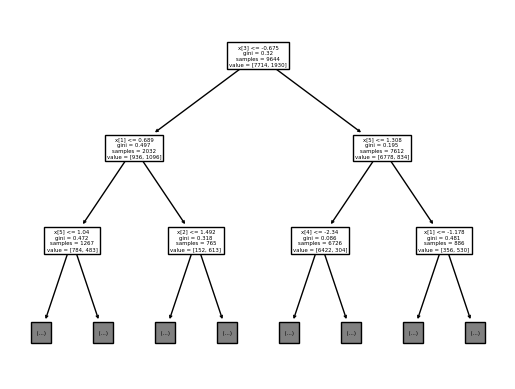

In [33]:
from sklearn.tree import DecisionTreeClassifier # Decision Tree

# model fitting and tuning
dtc = DecisionTreeClassifier()

dtc_params = {'criterion':['gini','entropy','log_loss'],
              'splitter':['best','random'],
              'class_weight':[{0:1,1:1},{0:1,1:2}],
              'max_features':['auto',4],  
              'random_state':[0]}

dtc_model=tune(dtc,
               X_train,
               Y_train,
               dtc_params,
               'multi_class')

# model evaluation on the validation set
cm, scores = eval_pred(dtc_model,
                       X_val,
                       Y_val,
                       task='multi_class',
                       disp=True)

from sklearn import tree
#dtc.fit(X_train,Y_train['Machine failure''])
tree.plot_tree(DecisionTreeClassifier(random_state=0).fit(X_train,Y_train['Machine failure']),
               max_depth=2)

## Bagging

Best model parameters: {'n_estimators': 10, 'random_state': 0}
Training time: 0.094 min

 Class-level report:
              precision    recall  f1-score   support

        None       0.98      0.99      0.98       964
         TWF       0.92      0.79      0.85        61
         HDF       0.92      0.98      0.95        60
         PWF       0.98      0.97      0.97        60
         DSF       0.95      0.95      0.95        60

    accuracy                           0.97      1205
   macro avg       0.95      0.93      0.94      1205
weighted avg       0.97      0.97      0.97      1205

Task-level report:
ACC    0.974
AUC    0.998
F1     0.974
dtype: float64 



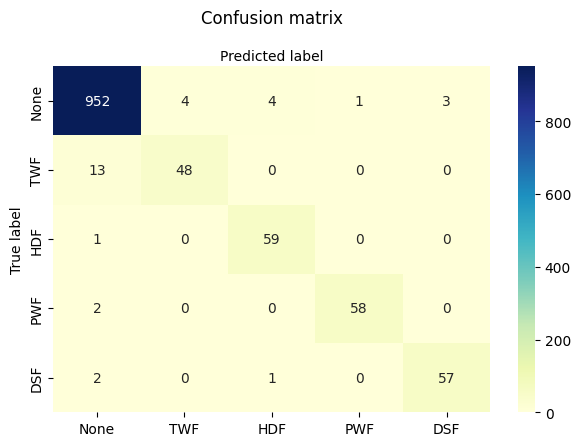

In [34]:
from sklearn.ensemble import BaggingClassifier

# model fitting and tuning
bgc = BaggingClassifier()

bgc_params ={'n_estimators':[10,20,50],
             'random_state':[0]}

bgc_model = tune(bgc,
                 X_train,
                 Y_train,
                 bgc_params,
                 'multi_class')

# model evaluation on the validation set
cm, scores = eval_pred(bgc_model,
                       X_val,
                       Y_val,
                       task='multi_class',
                       disp=True)

## Ada Boosting

Best model parameters: {'learning_rate': 0.5, 'n_estimators': 50, 'random_state': 0}
Training time: 0.153 min

 Class-level report:
              precision    recall  f1-score   support

        None       0.87      0.91      0.89       964
         TWF       0.31      0.51      0.39        61
         HDF       0.62      0.80      0.70        60
         PWF       0.00      0.00      0.00        60
         DSF       0.90      0.30      0.45        60

    accuracy                           0.81      1205
   macro avg       0.54      0.50      0.49      1205
weighted avg       0.79      0.81      0.79      1205

Task-level report:
ACC    0.807
AUC    0.932
F1     0.787
dtype: float64 



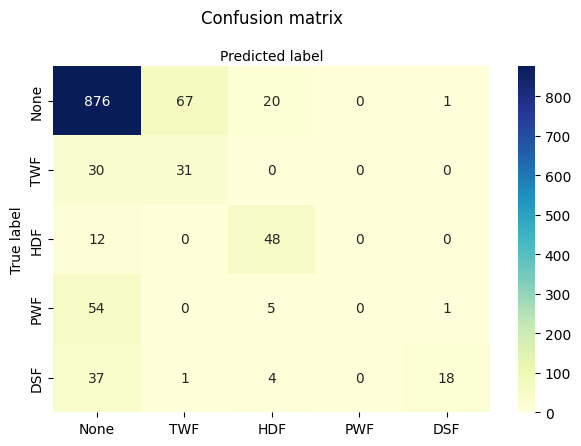

In [35]:
from sklearn.ensemble import AdaBoostClassifier

# model fitting and tuning
adb = AdaBoostClassifier()

adb_params ={'n_estimators':[50,100],
             'learning_rate':[0.5,1,2],
             'random_state':[0]}

adb_model = tune(adb,
                 X_train,
                 Y_train,
                 adb_params,
                 'multi_class')

# model evaluation on the validation set
cm, scores = eval_pred(adb_model,
                       X_val,
                       Y_val,
                       task='multi_class',
                       disp=True)

## Gradient Boosting Classifier

Best model parameters: {'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 0}
Training time: 0.413 min

 Class-level report:
              precision    recall  f1-score   support

        None       0.99      0.99      0.99       964
         TWF       0.85      0.84      0.84        61
         HDF       0.98      1.00      0.99        60
         PWF       1.00      0.98      0.99        60
         DSF       0.98      1.00      0.99        60

    accuracy                           0.98      1205
   macro avg       0.96      0.96      0.96      1205
weighted avg       0.98      0.98      0.98      1205

Task-level report:
ACC    0.982
AUC    0.998
F1     0.982
dtype: float64 



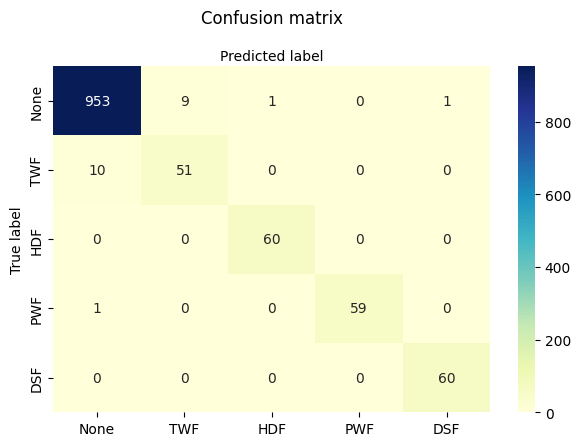

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

# model fitting and tuning
gbc = GradientBoostingClassifier()

gbc_params ={'n_estimators':[100],
             'learning_rate':[0.1],
             'random_state':[0]}

gbc_model = tune(gbc,
                 X_train,
                 Y_train,
                 gbc_params,
                 'multi_class')

# model evaluation on the validation set
cm, scores = eval_pred(gbc_model,
                       X_val,
                       Y_val,
                       task='multi_class',
                       disp=True)

## Random Forest

Best model parameters: {'criterion': 'gini', 'max_features': None, 'n_estimators': 50, 'random_state': 0}
Training time: 0.631 min

 Class-level report:
              precision    recall  f1-score   support

        None       0.99      0.99      0.99       964
         TWF       0.93      0.85      0.89        61
         HDF       0.94      0.98      0.96        60
         PWF       1.00      0.98      0.99        60
         DSF       0.94      0.97      0.95        60

    accuracy                           0.98      1205
   macro avg       0.96      0.95      0.96      1205
weighted avg       0.98      0.98      0.98      1205

Task-level report:
ACC    0.980
AUC    0.999
F1     0.980
dtype: float64 



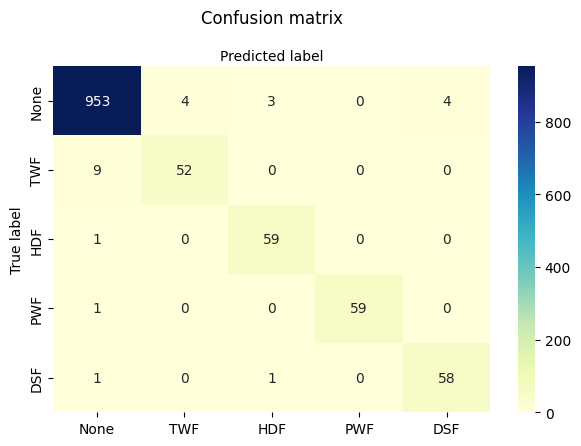

In [37]:
from sklearn.ensemble import RandomForestClassifier

# model fitting and tuning
rfc = RandomForestClassifier()

rfc_params = {'n_estimators':[50,100], 
              'criterion':['gini','log_loss'],
              'max_features':[None,'sqrt','log2'],  
              'random_state':[0]}
rfc_model=tune(rfc,
               X_train,
               Y_train,
               rfc_params,
               'multi_class')

# model evaluation on the validation set
cm, scores = eval_pred(rfc_model,
                       X_val,
                       Y_val,
                       task='multi_class',
                       disp=True)


## Stacking


 Class-level report:
              precision    recall  f1-score   support

        None       1.00      1.00      1.00       964
         TWF       1.00      1.00      1.00        61
         HDF       1.00      1.00      1.00        60
         PWF       1.00      0.98      0.99        60
         DSF       1.00      1.00      1.00        60

    accuracy                           1.00      1205
   macro avg       1.00      1.00      1.00      1205
weighted avg       1.00      1.00      1.00      1205

Task-level report:
ACC    0.999
AUC    1.000
F1     0.999
dtype: float64 



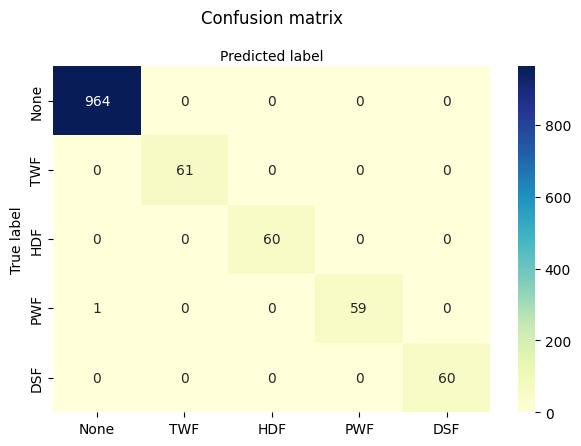

In [38]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline

# model fitting and tuning
estimators = [('rfc', RandomForestClassifier(n_estimators=50, random_state=10)),
              ('svm', make_pipeline(LinearSVC(random_state=10)))]

stk = StackingClassifier(estimators=estimators)

stk_model=stk.fit(X_val,
                  Y_val['Failure type'])

# model evaluation on the validation set
cm, scores = eval_pred(stk_model,
                       X_val,
                       Y_val,
                       task='multi_class',
                       disp=True)

## Comparison on the test dataset

In [39]:
models_ids = ['lgr','lda','qda','gnb','svm','dtc','bgc','adb','gbc','rfc','stk']
fitted_models=[lgr_model,lda_model,qda_model,gnb_model,svm_model,dtc_model,bgc_model,adb_model,gbc_model,rfc_model,stk_model]

y_pred, cm_dict, scores=predict_and_evaluate(fitted_models,
                                             X_test,
                                             Y_test,
                                             models_ids,
                                             'multi_class')

print('Comparison of clssasification models on the test dataset:')
print(scores)


Comparison of clssasification models on the test dataset:
       lgr    lda    qda    gnb    svm    dtc    bgc    adb    gbc    rfc  \
ACC  0.931  0.887  0.944  0.887  0.957  0.967  0.982  0.808  0.981  0.984   
AUC  0.985  0.969  0.992  0.963  0.992  0.961  0.998  0.924  0.998  0.999   
F1   0.938  0.861  0.948  0.892  0.958  0.967  0.982  0.792  0.981  0.984   

       stk  
ACC  0.957  
AUC  0.992  
F1   0.958  
